In [36]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt



In [37]:
# Load the weather dataset (You can replace 'weather_dataset.csv' with your dataset file)
data = pd.read_csv('weather.csv')



In [38]:
# Preprocessing: Convert categorical variables to numerical
data['outlook'] = data['outlook'].astype('category').cat.codes
data['temperature'] = data['temperature'].astype('category').cat.codes
data['humidity'] = data['humidity'].astype('category').cat.codes
data['windy'] = data['windy'].astype('category').cat.codes
data['play'] = data['play'].astype('category').cat.codes

In [39]:
# Assuming the target variable is named 'label', replace it with the actual name in your dataset
X = data.drop('play', axis=1)  # Features
y = data['play']  # Target variable



In [40]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [41]:
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)




In [42]:
# Training the classifier
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(n_estimators=50, random_state=42)

In [43]:
# Predicting on the test set
y_pred = rf_classifier.predict(X_test)


In [44]:

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


In [48]:
# Getting feature importances from the trained model
importances = rf_classifier.feature_importances_

# Getting the names of the features
feature_names = X.columns

In [49]:
# Sorting feature importances in descending order
indices = importances.argsort()[::-1]

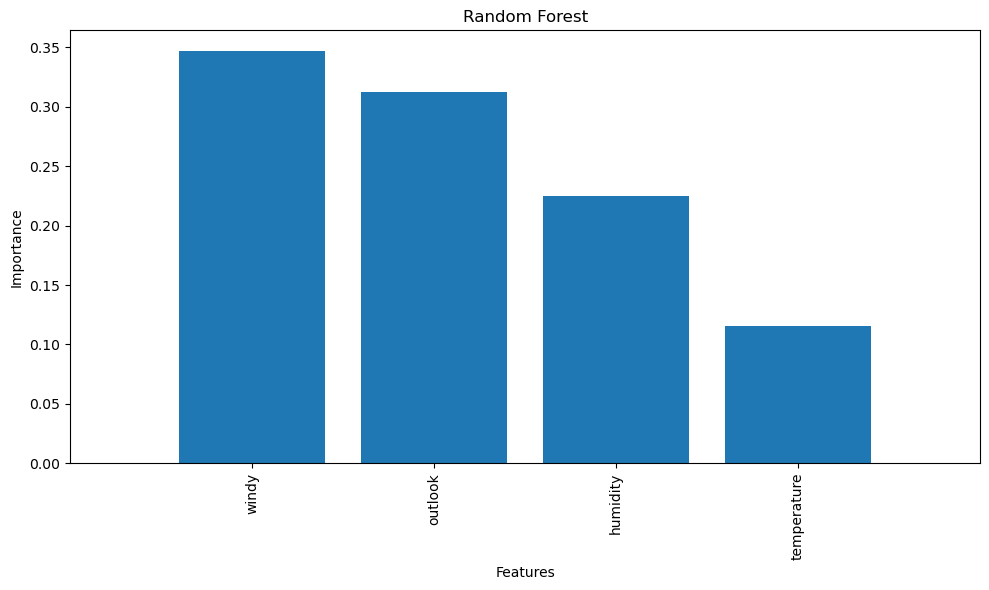

In [58]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()